### Set-up

In [23]:
# Imports
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns # note: if unused, to remove from dependencies

# Define global variables
num_features = 53

In [24]:
df = read_csv('data/dataset.csv', header = 0, index_col = 0, usecols = [i for i in range(0, num_features+1)])
df.dropna(inplace=True) # NA values after June 2017
print(df.shape)
df.head()

(294, 53)


,PALUM,PBANSOP,PBARL,PBEEF,PCOALAU,PCOCO,PCOFFOTM,PCOFFROB,PROIL,PCOPP,PCOTTIND,PFISH,PGNUTS,PHIDE,PIORECR,PLAMB,PLEAD,PLOGORE,PLOGSK,PMAIZMT,PNGASEU,PNGASJP,PNGASUS,PNICK,POILAPSP,POILBRE,POILDUB,POILWTI,POLVOIL,PORANG,PPOIL,PPORK,PPOULT,PRICENPQ,PRUBB,PSALM,PSAWMAL,PSAWORE,PSHRI,PSMEA,PSOIL,PSOYB,PSUGAEEC,PSUGAISA,PSUGAUSA,PSUNO,PTEA,PTIN,PURAN,PWHEAMT,PWOOLC,PWOOLF,PZINC
Commodity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1993M1,1208.10,524.92,75.08,106.80,35.0,1035.57,68.66,48.13,425.93,2264.21,57.29,503.41,670.00,79.87,12.58,110.20,436.90,195.11,240.04,94.10,2.70,3.61,1.95,5948.10,17.24,17.35,15.30,19.06,2757.83,426.06,338.81,59.14,50.48,262.0,41.09,5.25,605.35,225.02,13.01,203.32,468.04,212.33,25.48,8.24,20.76,582.52,239.49,5913.10,9.80,155.65,312.39,495.22,1067.57
1993M2,1203.15,585.61,74.83,108.32,31.0,990.99,67.46,48.25,419.78,2212.18,60.55,424.40,693.50,81.41,12.58,105.26,415.00,194.37,286.70,94.25,2.70,3.68,1.74,6050.75,18.23,18.48,16.16,20.04,2587.66,412.41,351.21,62.98,51.05,254.0,40.57,5.07,618.11,253.74,13.12,195.97,456.80,210.03,23.90,8.56,21.05,570.79,203.56,5792.75,10.10,148.88,309.68,469.37,1073.63
1993M3,1150.48,659.00,75.16,114.59,31.0,977.32,62.77,46.86,435.22,2152.38,61.45,422.92,772.61,81.48,12.58,112.07,405.43,210.57,345.34,97.54,2.70,3.60,2.17,5974.91,18.50,18.75,16.44,20.32,2628.83,364.46,337.16,65.60,52.18,230.0,38.47,4.93,616.81,263.16,13.34,199.39,462.75,214.12,24.28,10.62,21.57,574.59,190.48,5666.30,10.20,147.90,309.67,469.37,996.76
1993M4,1110.28,563.70,77.45,117.57,31.0,1010.75,56.88,45.51,454.70,1953.62,61.07,424.59,780.00,81.60,12.58,121.77,422.11,221.89,463.41,100.49,2.61,3.82,2.33,5987.50,18.44,18.63,16.43,20.26,2783.90,380.62,323.94,63.73,53.51,206.0,37.39,5.46,645.42,284.55,13.34,204.27,468.26,217.68,25.72,11.15,21.69,607.14,177.75,5596.50,10.35,141.99,328.92,429.69,1006.00
1993M5,1125.42,461.60,77.46,121.39,31.0,998.07,61.48,46.91,436.65,1799.35,60.17,395.28,812.38,80.35,12.58,127.25,407.66,243.97,520.81,99.22,2.60,3.80,2.14,5777.79,18.17,18.51,16.07,19.94,2787.13,393.62,305.76,66.60,56.33,185.0,36.94,5.85,776.63,292.74,13.34,211.56,467.38,221.49,25.75,11.83,21.36,640.15,172.86,5505.47,10.10,136.58,337.01,468.13,979.26


### POILBRE vs POILWTI

In [25]:
df[['POILBRE']].describe()

,POILBRE
count,294.000000
mean,51.006803
std,34.538264
min,9.800000
25%,20.005000
50%,43.040000
75%,74.580000
max,133.900000


In [26]:
df[['POILWTI']].describe()

,POILWTI
count,294.000000
mean,49.711667
std,30.702583
min,11.310000
25%,21.260000
50%,42.195000
75%,75.067500
max,133.930000


In [41]:
df[['POILBRE', 'POILWTI']].corr()

,POILBRE,POILWTI
POILBRE,1.000000,0.990427
POILWTI,0.990427,1.000000


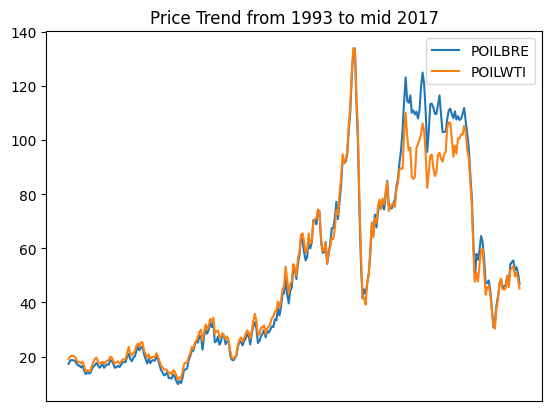

In [34]:
poilbre_line_plot = plt.plot(df.index, df['POILBRE'], label='POILBRE')
poilwti_line_plot = plt.plot(df.index, df['POILWTI'], label='POILWTI')
plot_gca = plt.gca()
plot_gca.set_title('Price Trend from 1993 to mid 2017')
plt.legend()
plot_gca.axes.get_xaxis().set_ticks([])
plt.show()

Although prices closely follow each other, there is a period where POILBRE's prices are noticeably higher than POILWTI whilst maintaining similar trends. 

#### POILBRE vs POILWTI(t-1)

In [44]:
df['POILWTI(t-1)'] = df['POILWTI'].shift(1)
df[['POILBRE', 'POILWTI(t-1)']].corr()

,POILBRE,POILWTI(t-1)
POILBRE,1.000000,0.980307
POILWTI(t-1),0.980307,1.000000


Not really a surprise, POILWTI data from the previous month has a slightly weaker correlation with POILBRE than from the same period. However, it would be interesting to compare lags in days - we may find stronger correlations.